In [68]:
import pandas as pd                                             #include libraries
import matplotlib as mlb
import seaborn as sbn
import numpy as np

In [9]:
df=pd.read_csv("StudentsPerformance_modified.csv")             #load datafile

In [10]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [29]:
df.dropna(axis=0,inplace=True)                                    #drop NULL values

In [30]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [31]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math_score                      object
reading_score                  float64
writing_score                  float64
dtype: object

In [32]:
df.rename(columns={'math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [33]:
df.dtypes


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math_score                      object
reading_score                  float64
writing_score                  float64
dtype: object

In [34]:
df=df[df.math_score!='?']                                         #remove records with '?' char

In [35]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course math_score  reading_score  writing_score  
0                      none     

In [37]:
df['math_score']=df['math_score'].astype(float)                          #change datatype of math_score column

/tmp/ipykernel_3380/3506972676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math_score']=df['math_score'].astype(float)


In [38]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math_score                     float64
reading_score                  float64
writing_score                  float64
dtype: object

<AxesSubplot:>

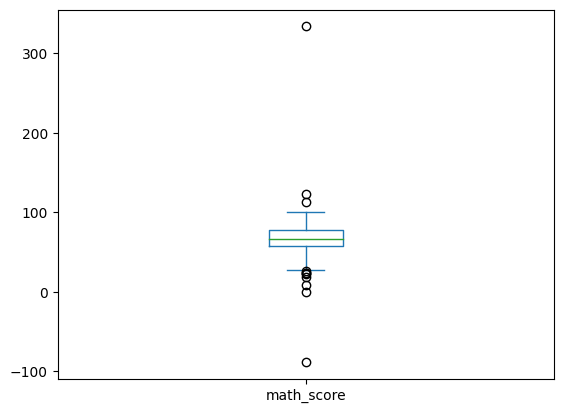

In [39]:
df['math_score'].plot(kind="box")
                                                                   #plot on graph for outliers for math_score column

In [40]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

math_score       20.0
reading_score    20.0
writing_score    21.0
dtype: float64


In [46]:
LL= q1-(IQR*1.5)                 
UL = q3+(IQR * 1.5)
print(LL)
print(UL)


math_score       27.0
reading_score    29.0
writing_score    26.5
dtype: float64
math_score       107.0
reading_score    109.0
writing_score    110.5
dtype: float64


In [48]:
lower= df<LL
print(lower)

     gender  lunch  math_score  parental level of education  race/ethnicity  \
0     False  False       False                        False           False   
1     False  False       False                        False           False   
2     False  False       False                        False           False   
3     False  False       False                        False           False   
4     False  False       False                        False           False   
..      ...    ...         ...                          ...             ...   
995   False  False       False                        False           False   
996   False  False       False                        False           False   
997   False  False       False                        False           False   
998   False  False       False                        False           False   
999   False  False       False                        False           False   

     reading_score  test preparation course  writin

/tmp/ipykernel_3380/166686583.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower= df<LL


In [49]:
upper=df>UL
print(upper)

     gender  lunch  math_score  parental level of education  race/ethnicity  \
0     False  False       False                        False           False   
1     False  False       False                        False           False   
2     False  False       False                        False           False   
3     False  False       False                        False           False   
4     False  False       False                        False           False   
..      ...    ...         ...                          ...             ...   
995   False  False       False                        False           False   
996   False  False       False                        False           False   
997   False  False       False                        False           False   
998   False  False       False                        False           False   
999   False  False       False                        False           False   

     reading_score  test preparation course  writin

/tmp/ipykernel_3380/3534953202.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper=df>UL


In [51]:
df[(lower|upper)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
out=df[~(lower | upper).any(axis=1)]                                         #remove outliers
df=out
print(out)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math_score  reading_score  writing_score  
0                      none        72.0           72.0         

In [60]:
df.shape


(912, 8)

<AxesSubplot:>

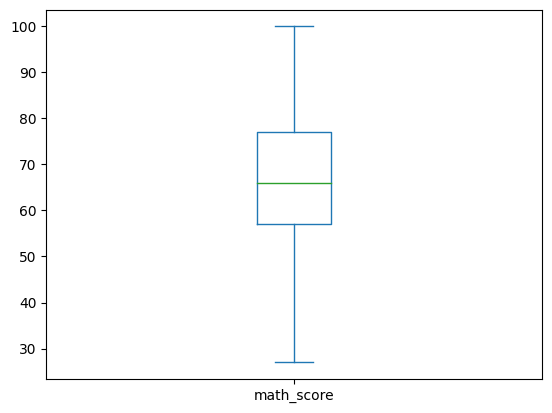

In [61]:
df['math_score'].plot(kind="box")                                        #no outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler                        #change scale to 0-10

scaler = MinMaxScaler(feature_range=(0,10))
df[['math_score']] = scaler.fit_transform(df[['math_score']])
df['math_score'] = df['math_score'].round(1)

In [72]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,6.2,72.0,74.0
1,female,group C,some college,standard,completed,5.8,90.0,88.0
2,female,group B,master's degree,standard,none,8.6,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,2.7,57.0,44.0
4,male,group C,some college,standard,none,6.7,78.0,75.0


In [73]:
print(df.skew())                                                        #checked skewness 

math_score      -0.024553
reading_score   -0.107901
writing_score   -0.097526
dtype: float64


/tmp/ipykernel_3380/1926848427.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())
